## Seperately transformed

In [15]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

allDat = np.load('./tan_proj.npz', allow_pickle=True)
tr, rs = allDat['task_residuals'], allDat['resting_state']

trDist = np.linalg.norm(tr - np.mean(tr, axis=0), axis=-1)
rsDist = np.linalg.norm(rs - np.mean(rs, axis=0), axis=-1)

Outliers:

99.00% percentile (186 outliers): task residuals 4.71, resting state 6.92.
Variance if exclude the outliers: task residuals 12.63, resting state 32.86.

99.50% percentile (93 outliers): task residuals 4.87, resting state 7.14.
Variance if exclude the outliers: task residuals 12.68, resting state 32.95.

99.90% percentile (19 outliers): task residuals 5.19, resting state 7.60.
Variance if exclude the outliers: task residuals 12.73, resting state 33.03.

99.95% percentile (9 outliers): task residuals 5.29, resting state 7.77.
Variance if exclude the outliers: task residuals 12.73, resting state 33.04.

99.99% percentile (2 outliers): task residuals 5.68, resting state 8.04.
Variance if exclude the outliers: task residuals 12.74, resting state 33.05.

100.00% percentile (0 outliers): task residuals 6.57, resting state 8.62.
Variance if exclude the outliers: task residuals 12.74, resting state 33.06.


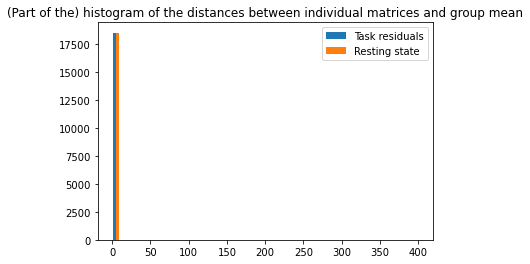

In [16]:
plt.hist(np.vstack([trDist, rsDist]).T, bins=40, range=[0, 400])
plt.legend(['Task residuals', 'Resting state'])
plt.title('(Part of the) histogram of the distances between individual matrices and group mean')

print('Outliers:')
for p in [99, 99.5, 99.9, 99.95, 99.99, 100]:
    tmp1, tmp2 = np.percentile(trDist, p), np.percentile(rsDist, p)
    print('\n%.2f%% percentile (%d outliers): task residuals %.2f, resting state %.2f.' %
        (p, np.round((100 - p) / 100 * np.size(trDist)), tmp1, tmp2))
    print(
        'Variance if exclude the outliers: task residuals %.2f, resting state %.2f.' %
            (np.sum(np.var(tr[np.ix_(trDist <= tmp1, range(tr.shape[-1]))], axis=0)),
                np.sum(np.var(rs[np.ix_(rsDist <= tmp2, range(rs.shape[-1]))], axis=0)))
    )

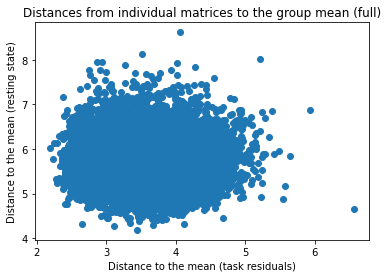

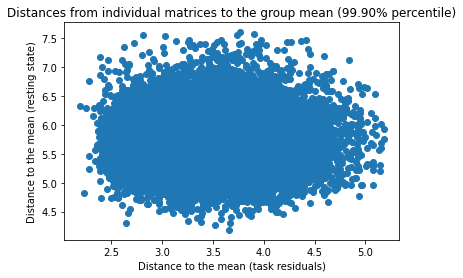

In [17]:
plt.scatter(trDist, rsDist)
plt.xlabel('Distance to the mean (task residuals)')
plt.ylabel('Distance to the mean (resting state)')
plt.title('Distances from individual matrices to the group mean (full)')
plt.show()

plt.scatter(trDist[trDist <= np.percentile(trDist, 99.90)],
    rsDist[rsDist <= np.percentile(rsDist, 99.90)])
plt.xlabel('Distance to the mean (task residuals)')
plt.ylabel('Distance to the mean (resting state)')
plt.title('Distances from individual matrices to the group mean (99.90% percentile)')
plt.show()

# Correlation between residuals and resting state data

(array([7.800e+01, 7.350e+02, 3.881e+03, 7.847e+03, 4.986e+03, 9.690e+02,
        5.300e+01, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.06643214,  0.00145065,  0.06933344,  0.13721622,  0.20509901,
         0.2729818 ,  0.34086459,  0.40874737,  0.47663016,  0.54451295,
         0.61239574]),
 <BarContainer object of 10 artists>)

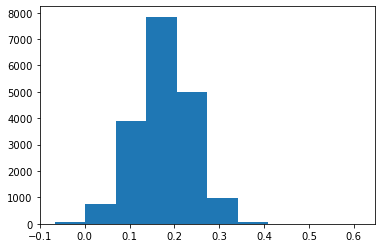

In [18]:
mCorr = np.zeros(rs.shape[0])
for i in range(rs.shape[0]):
    mCorr[i] = np.corrcoef(tr[i, :].T, rs[i, :].T)[0, 1]
plt.hist(mCorr)

## Jointly Transformed

In [5]:
tt = allDat['transformed_together'].item()
tt = np.vstack([tt['task_residuals'], tt['resting_state']])
ttDist = np.linalg.norm(tt - np.mean(tt, axis=0), axis=-1)

Outliers for simultaneously projected data:

99.00% percentile (371 outliers): 6.90.
Variance if exclude the outliers: 25.44.

99.50% percentile (186 outliers): 7.05.
Variance if exclude the outliers: 25.55.

99.90% percentile (37 outliers): 7.46.
Variance if exclude the outliers: 25.66.

99.95% percentile (19 outliers): 7.65.
Variance if exclude the outliers: 25.67.

99.99% percentile (4 outliers): 7.99.
Variance if exclude the outliers: 25.69.

100.00% percentile (0 outliers): 8.63.
Variance if exclude the outliers: 25.69.


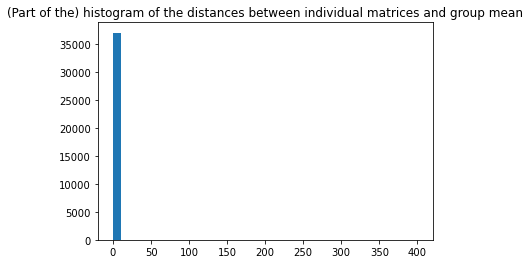

In [6]:
plt.hist(ttDist, bins=40, range=[0, 400])
plt.title('(Part of the) histogram of the distances between individual matrices and group mean')

print('Outliers for simultaneously projected data:')
for p in [99, 99.5, 99.9, 99.95, 99.99, 100]:
    tmp3 = np.percentile(ttDist, p)
    print('\n%.2f%% percentile (%d outliers): %.2f.' %
        (p, np.round((100 - p) / 100 * np.size(ttDist)), tmp3))
    print(
        'Variance if exclude the outliers: %.2f.' %
            np.sum(np.var(tt[np.ix_(ttDist <= tmp3, range(tt.shape[-1]))], axis=0))
    )

In [7]:
tt = allDat['transformed_together'].item()
newtr, newrs = tt['task_residuals'], tt['resting_state']

newtrDist = np.linalg.norm(newtr - np.mean(newtr, axis=0), axis=-1)
newrsDist = np.linalg.norm(newrs - np.mean(newrs, axis=0), axis=-1)

print('Distance between the residuals\' projection when projected seperately or jointly: ',
    np.linalg.norm(rs - newrs))
print('Distance between the resting state\'s projection when projected seperately or jointly: ',
    np.linalg.norm(tr - newtr))

Distance between the residuals' projection when projected seperately or jointly:  265.87175995579366
Distance between the resting state's projection when projected seperately or jointly:  257.28787649298664


Outliers:

99.00% percentile (186 outliers): task residuals 4.64, resting state 6.87.
Variance if exclude the outliers: task residuals 12.26, resting state 32.02.

99.50% percentile (93 outliers): task residuals 4.79, resting state 7.10.
Variance if exclude the outliers: task residuals 12.31, resting state 32.10.

99.90% percentile (19 outliers): task residuals 5.12, resting state 7.60.
Variance if exclude the outliers: task residuals 12.35, resting state 32.18.

99.95% percentile (9 outliers): task residuals 5.25, resting state 7.73.
Variance if exclude the outliers: task residuals 12.36, resting state 32.20.

99.99% percentile (2 outliers): task residuals 5.59, resting state 8.03.
Variance if exclude the outliers: task residuals 12.37, resting state 32.21.

100.00% percentile (0 outliers): task residuals 6.47, resting state 8.55.
Variance if exclude the outliers: task residuals 12.37, resting state 32.21.


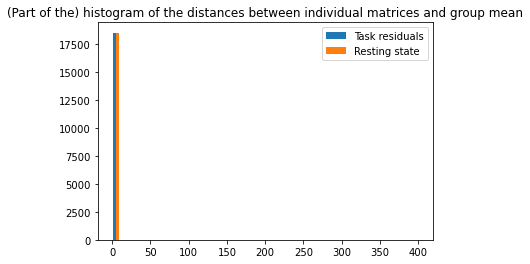

In [8]:
plt.hist(np.vstack([newtrDist, newrsDist]).T, bins=40, range=[0, 400])
plt.legend(['Task residuals', 'Resting state'])
plt.title('(Part of the) histogram of the distances between individual matrices and group mean')

print('Outliers:')
for p in [99, 99.5, 99.9, 99.95, 99.99, 100]:
    tmp1, tmp2 = np.percentile(newtrDist, p), np.percentile(newrsDist, p)
    print('\n%.2f%% percentile (%d outliers): task residuals %.2f, resting state %.2f.' %
        (p, np.round((100 - p) / 100 * np.size(newtrDist)), tmp1, tmp2))
    print(
        'Variance if exclude the outliers: task residuals %.2f, resting state %.2f.' %
            (np.sum(np.var(newtr[np.ix_(newtrDist <= tmp1, range(newtr.shape[-1]))], axis=0)),
                np.sum(np.var(newrs[np.ix_(newrsDist <= tmp2, range(newrs.shape[-1]))], axis=0)))
    )

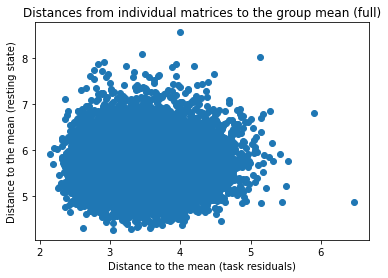

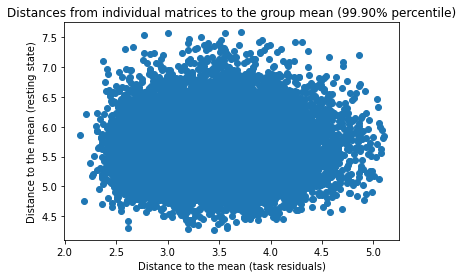

In [9]:
plt.scatter(newtrDist, newrsDist)
plt.xlabel('Distance to the mean (task residuals)')
plt.ylabel('Distance to the mean (resting state)')
plt.title('Distances from individual matrices to the group mean (full)')
plt.show()

plt.scatter(newtrDist[newtrDist <= np.percentile(newtrDist, 99.90)],
    newrsDist[newrsDist <= np.percentile(newrsDist, 99.90)])
plt.xlabel('Distance to the mean (task residuals)')
plt.ylabel('Distance to the mean (resting state)')
plt.title('Distances from individual matrices to the group mean (99.90% percentile)')
plt.show()

(array([2.450e+02, 2.816e+03, 7.422e+03, 6.212e+03, 1.677e+03, 1.660e+02,
        1.400e+01, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.26916593, -0.17359276, -0.07801958,  0.0175536 ,  0.11312677,
         0.20869995,  0.30427312,  0.3998463 ,  0.49541948,  0.59099265,
         0.68656583]),
 <BarContainer object of 10 artists>)

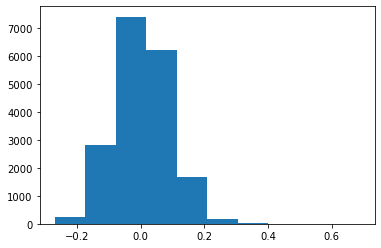

In [10]:
newmCorr = np.zeros(newrs.shape[0])
for i in range(newrs.shape[0]):
    newmCorr[i] = np.corrcoef(newtr[i, :].T, newrs[i, :].T)[0, 1]
plt.hist(newmCorr)